In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression, make_swiss_roll
import seaborn as sns

MACHINE LEARNING

## UNSUPERVISED LEARNING - HDBSCAN Clustering using PCA

In [3]:
# Import the data
# file_path = Path("/content/Copy_of_myopia.csv")
# df = pd.read_csv(file_path)
url = 'https://raw.githubusercontent.com/mward95/project_4/main/data/Copy_of_myopia.csv'
df = pd.read_csv(url)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [5]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [6]:
# Remove the Myopic Column
df = df.drop(columns=["MYOPIC", "DIOPTERHR", 'STUDYYEAR'])
df.head()

,ID,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
0,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,1,1
1,2,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,1,1
2,3,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,0,0
3,4,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,0,1
4,5,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,1,0


In [7]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column ID has 0 null values
Column AGE has 0 null values
Column GENDER has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [8]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Applying Dimensional Reduction

1 - Using PCA

In [9]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
print(myopia_scaled[0:2])

[[-1.7292504  -0.42021911  1.02291623 -1.36391691 -0.89286055  0.4837838
  -0.28144248 -1.01979129  4.1506609   1.69744958 -0.68931054 -0.67299591
   0.18405806  0.98713773  1.0032415 ]
 [-1.72364505 -0.42021911  1.02291623 -0.3086122  -0.17183857  0.53591074
  -0.96799697 -0.13076248 -0.99889822 -0.91206246 -0.36187479 -0.22140908
  -0.34093217  0.98713773  1.0032415 ]]


In [10]:
# Applying PCA to reduce dimensions from 16 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [11]:
x_pca = pca.transform(myopia_scaled)
print(myopia_scaled.shape)
print(x_pca.shape)

(618, 15)
(618, 2)


Text(0, 0.5, 'Principal component 2')

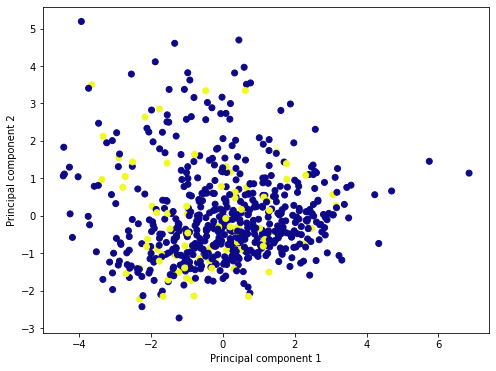

In [12]:
plt.figure (figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap = 'plasma')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')


### x_pca helped compress the 15 columns to 2 columns - The graph above shows Myopic and Non-Myopic children data when plotted against the 2 Principal components

In [13]:
pca.components_

array([[ 0.04693767, -0.25052954,  0.26146008,  0.24505574, -0.52768587,
        -0.34400111,  0.32199998, -0.49583112, -0.11740941, -0.05341809,
        -0.12169485, -0.14523331, -0.07346172, -0.04591811, -0.01582943],
       [ 0.18030531,  0.40949447,  0.14476573, -0.00493811, -0.13898227,
        -0.10342051,  0.13313518, -0.1372651 ,  0.26942422,  0.4843496 ,
         0.11823405,  0.58119437,  0.1788903 , -0.13711547, -0.04991677]])

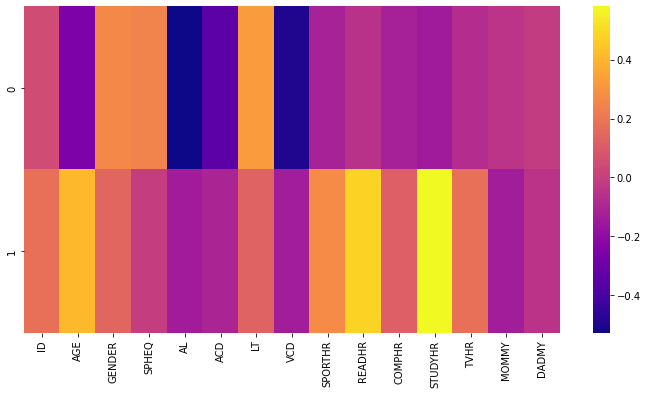

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

### The Heat map above shows the range of compressed values (using PCA) of the specific variables in each of the DataFrame columns that fall in either of the 2 PCA columns. No relevancy of the specific column to Myopia. 
### For example if we had 3 Principal components instead of 2, the heat map would be the following:
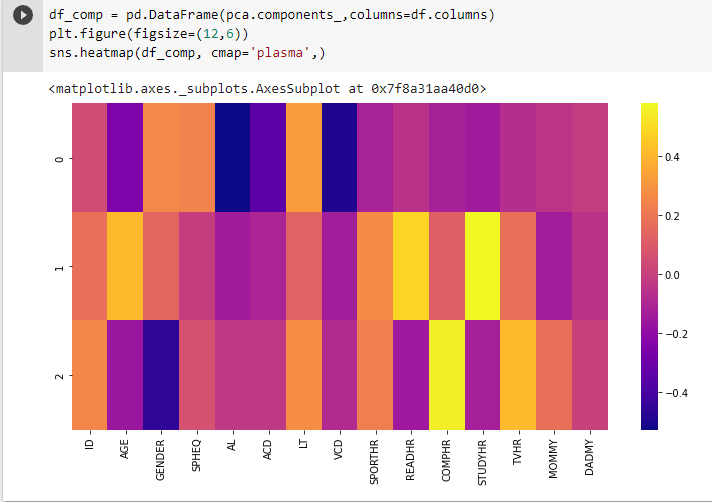

In [15]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"] 
    # , "principal component 3"]
)
# , "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12"]
df_pca

,principal component 1,principal component 2
0,0.206896,1.165158
1,0.081899,-1.603997
2,0.625355,-0.880817
3,0.665711,0.760430
4,-1.214253,-2.724368
...,...,...
613,0.516851,0.174556
614,0.161658,-1.182123
615,-0.414244,-1.719006
616,1.492408,0.377291


In [16]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19285076, 0.10386011])

## Cluster Analysis with HDBSCAN 

### HDBSCAN uses only "min_cluster_size" as input and tries to heirarchically gets the eps value

In [18]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 9.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340293 sha256=944a6be1d48a0284b37bd93e0ebe6bddb8afee48d0180e51f7b3f9d5d4d48515
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [22]:
import hdbscan

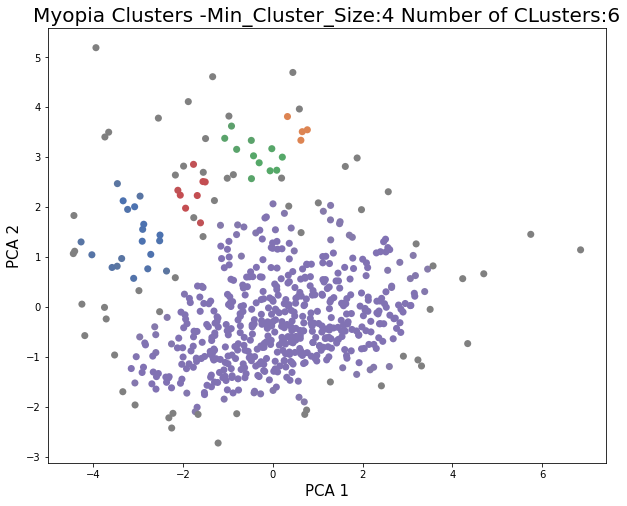

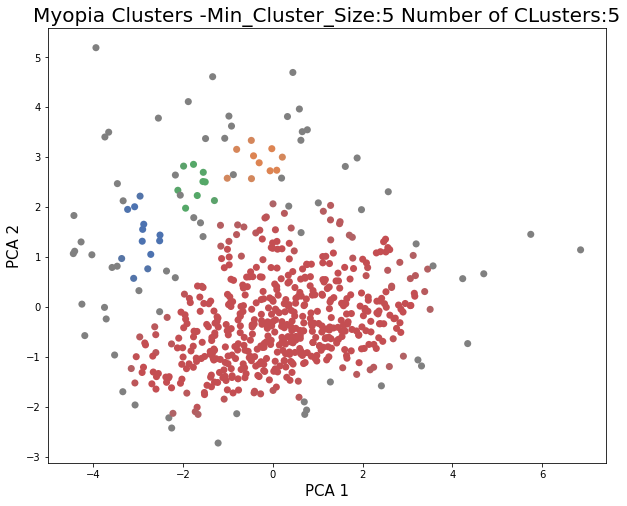

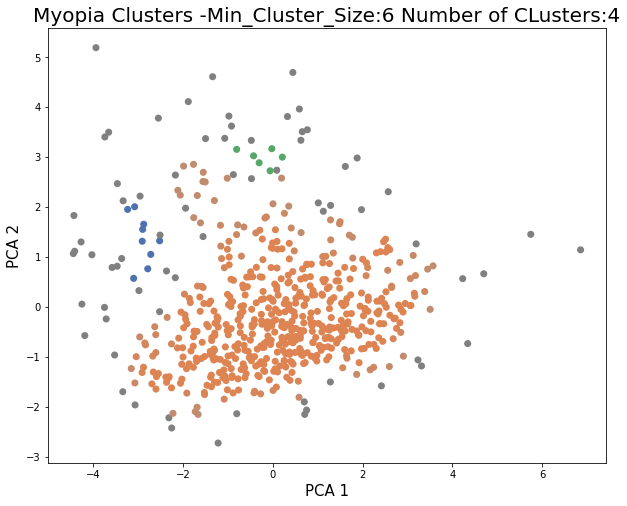

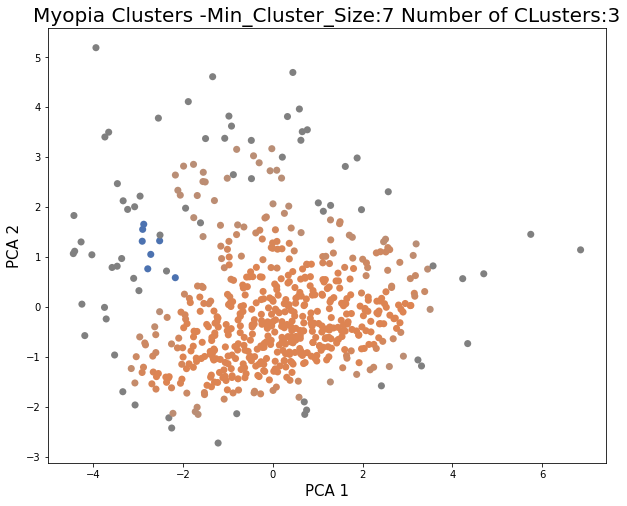

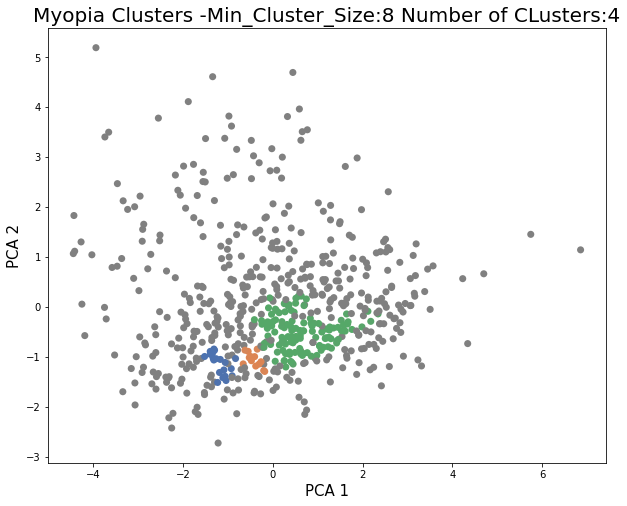

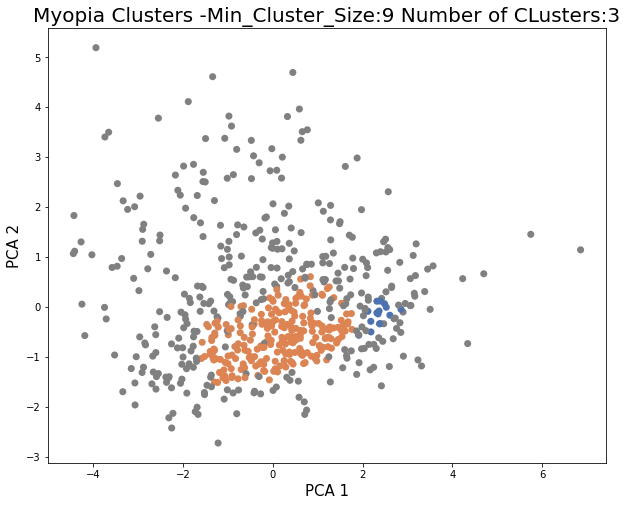

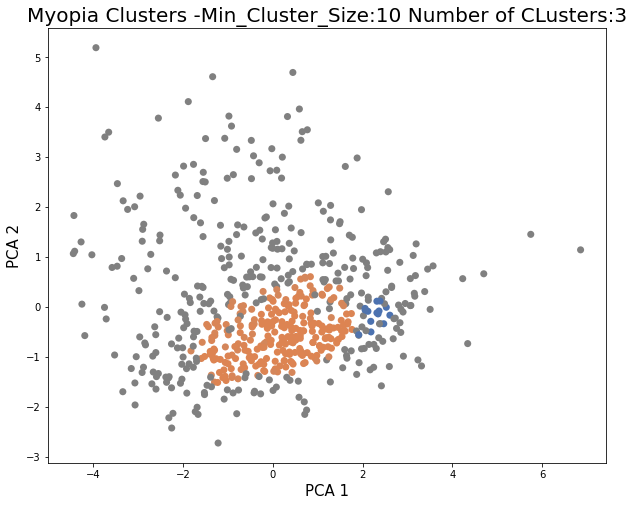

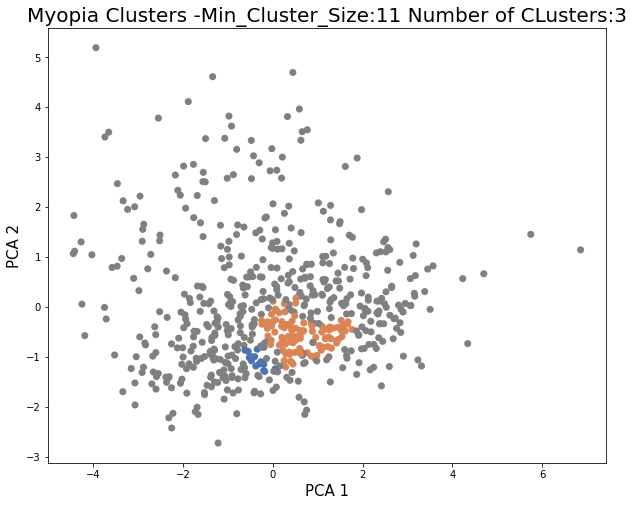

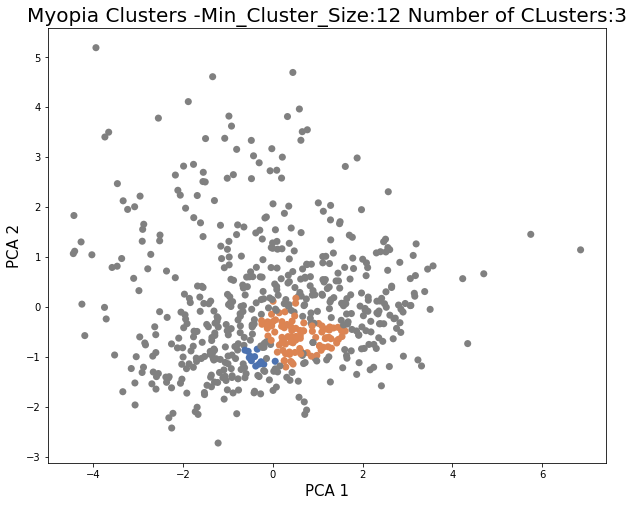

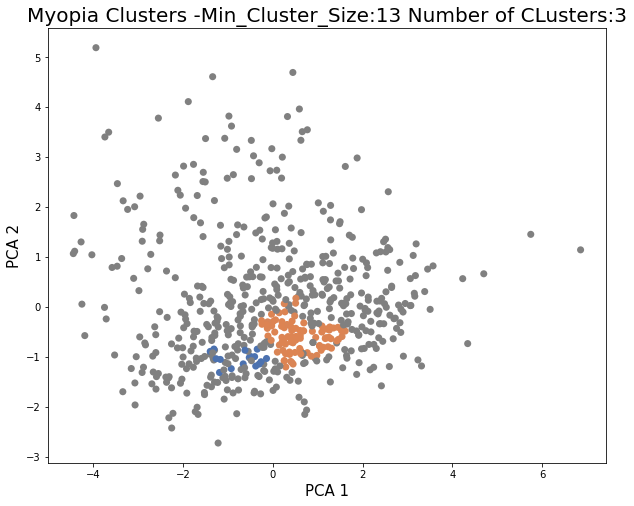

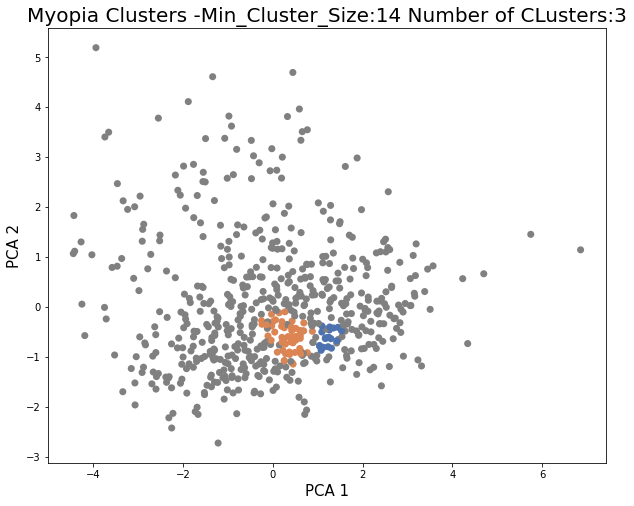

In [55]:
# Making a FOR Loop to see the visualize the clustering using HDBSCAN - min cluster value of 3 would give an error
for mclus in range(4,15, 1):
    dbscan = hdbscan.HDBSCAN(min_cluster_size=mclus).fit(df_pca)
    color_palette = sns.color_palette('deep', 8)
    cluster_colors = [color_palette[x] if x >= 0
                      else (0.5, 0.5, 0.5)
                      for x in dbscan.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                            zip(cluster_colors, dbscan.probabilities_)]
    labels = dbscan.labels_ 
    set(labels)
    lablen = len(set(labels))
    plt.figure(figsize=(10,8))
    plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], s=50, linewidth=0, c=cluster_member_colors, alpha=1)
    plt.xlabel('PCA 1', fontsize = 15)
    plt.ylabel('PCA 2', fontsize = 15)
    plt.title(label = f'Myopia Clusters -Min_Cluster_Size:{mclus} Number of CLusters:{lablen}', fontsize = 20, fontweight = 20)
    plt.show()

### Condensed Tree helps visualize cluster heirarchy - cluster near each other and one's that are far - The hierarchy is represented by the dendrogram below, the width (and color) of each branch represents the number of points in the cluster at that level
### Based on dendogram and data distrubution - min_cluster_size of 4, 5 & 6 represent the Myopia data appropriately

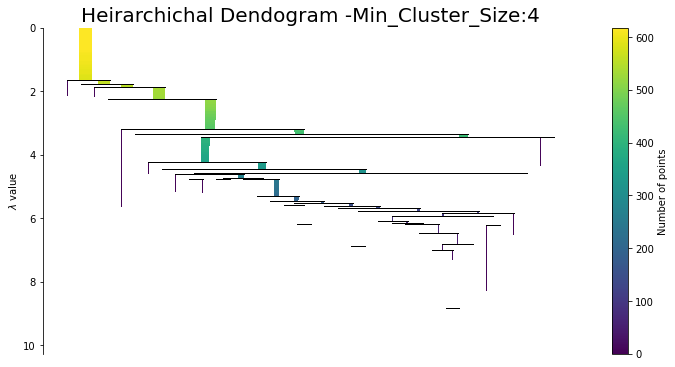

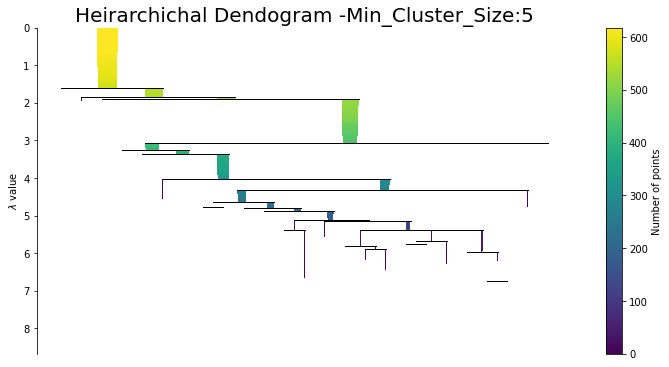

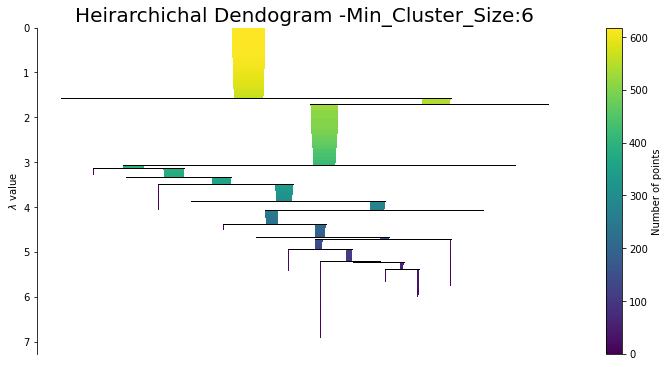

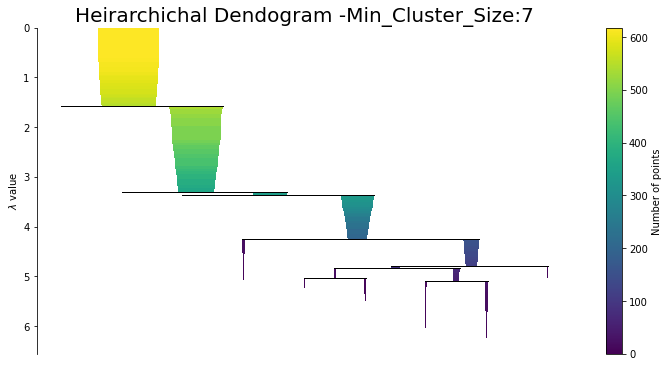

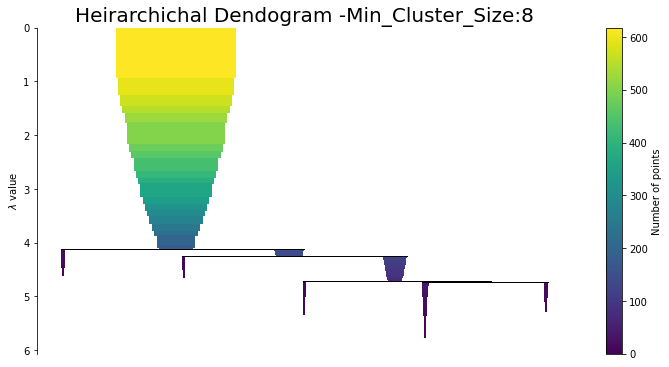

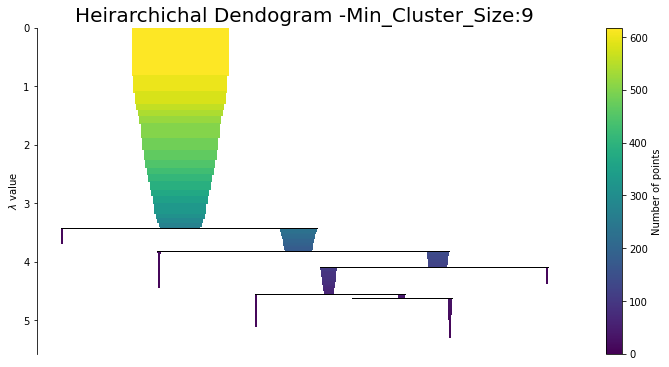

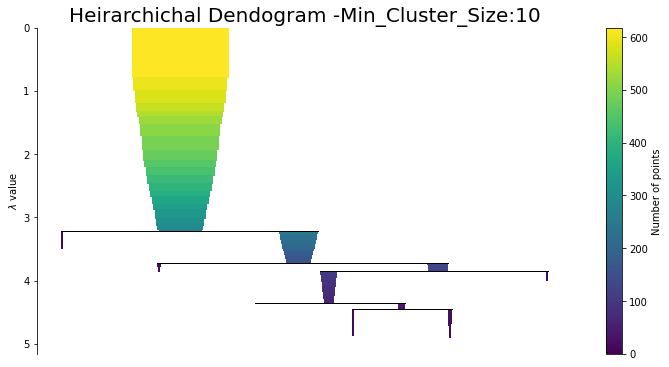

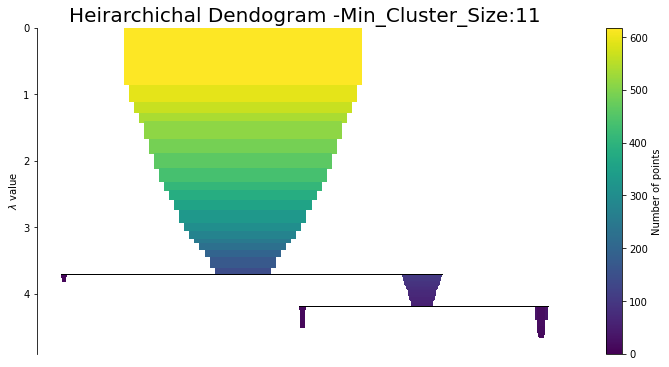

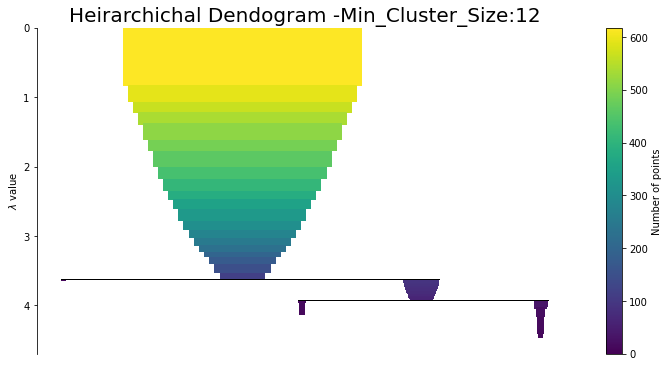

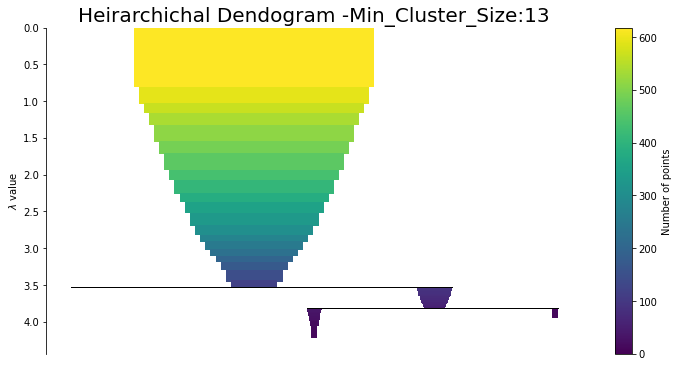

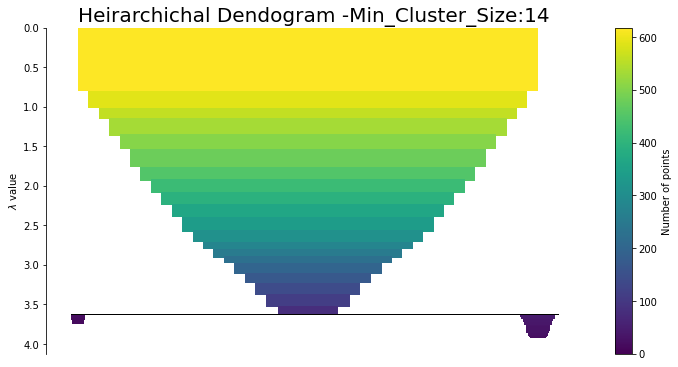

In [57]:
for dclus in range(4,15, 1):
  dbscan1 = hdbscan.HDBSCAN(min_cluster_size=dclus).fit(df_pca)
  plt.figure(figsize=(12,6))
  plt.title(label = f'Heirarchichal Dendogram -Min_Cluster_Size:{dclus}', fontsize = 20, fontweight = 20)
  dbscan1.condensed_tree_.plot()

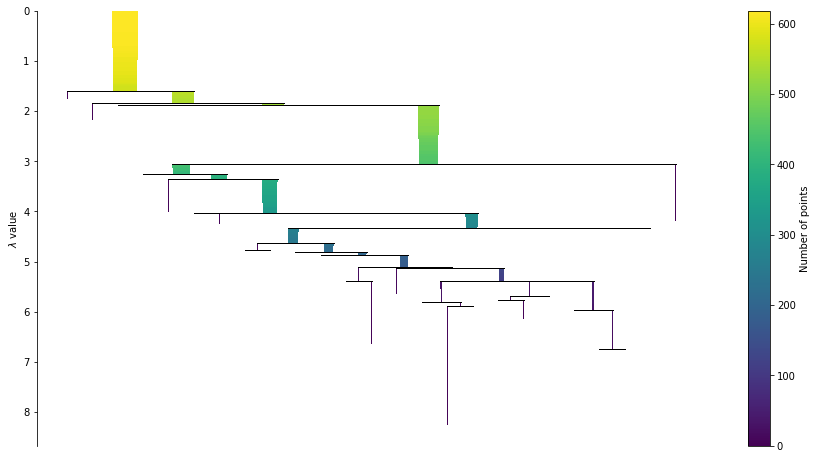